<a href="https://colab.research.google.com/github/okana2ki/ML/blob/main/%E7%AC%AC2%E7%AB%A0_MNIST_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://weblabo.oscasierra.net/python/keras-mnist-sample.html

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
# MNISTデータを読込む
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(f"X_train(学習用の画像データのサイズ) : {X_train.shape}")
print(f"y_train(学習データの正解ラベルのサイズ) : {y_train.shape}")
print(f"X_test(検証用の画像データのサイズ) : {X_test.shape}")
print(f"y_test(検証データの正解ラベルのサイズ) : {y_test.shape}")

X_train(学習用の画像データのサイズ) : (60000, 28, 28)
y_train(学習データの正解ラベルのサイズ) : (60000,)
X_test(検証用の画像データのサイズ) : (10000, 28, 28)
y_test(検証データの正解ラベルのサイズ) : (10000,)


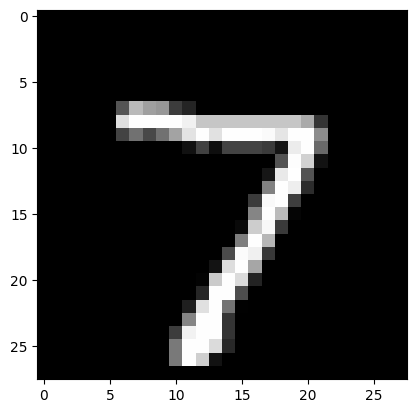

In [3]:
import matplotlib.pyplot as plt
sample = 0
image = X_test[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

さて、この28行28列のデータですが、コンピュータで処理しやすいよう、まず1行に並べてしまいます（あるいは1列にならべてしまいます）。

In [4]:
X_train  = X_train.reshape(60000, 784)
X_test   = X_test.reshape(10000, 784)
print("X_train.shape(学習用の画像データ) : ", X_train.shape)
print("y_train_shape(学習用の正解データ) : ", y_train.shape)
print("X_test.shape(検証用の画像データ) : ", X_test.shape)
print("y_test.shape(検証用の正解データ) : ", y_test.shape)

X_train.shape(学習用の画像データ) :  (60000, 784)
y_train_shape(学習用の正解データ) :  (60000,)
X_test.shape(検証用の画像データ) :  (10000, 784)
y_test.shape(検証用の正解データ) :  (10000,)


MNIST のピクセル情報を計算の都合上、0-1.0 の範囲の数値にする。
データを小数点計算に有利な float に変換してから255 で割る。

In [5]:
# 最初にデータを小数点を含む値(float) 型に変換
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# 0-255 のデータを 0-1 の範囲に変換
X_train /= 255
X_test  /= 255

次に正解ラベルをワンホットエンコーディングします。例えば「5」という数字であれば [0,0,0,0,0,1,0,0,0,0] と、6番目（0起算なので）だけ1で、残りは0のリストに変換します。カテゴリ化と言い換えることもできます。kerasの機能を使います。

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

さて、これでデータの準備が終わりました。
次に、学習データをAIに与え、その結果を使ってテストデータの精度を検証します。
AIは、学習データ（画像）とそのラベル（描かれている数字）の対応を学習します。続いて、その学習結果を使って、学習には使っていないデータ、つまりテストデータの画像から、描かれている数字を予測します。テストデータには回答のラベルがあるので、AIの予測結果（精度）を評価できるわけです。

学習では、AIは与えられた画像からラベルを予測し、それが答えと一致してるかどうかを調べ、一致していない場合、もう一度学習しなおすことを繰り返します。
学習ステップは、ディープラーニングとして知られるアルゴリズムで行われます。ディープラーニングの基本的アイデアは、
ニューラルネットワークです。という入力（画像）と出力kerasライブラリは、これをうまく実行してくれます。

In [7]:
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


初めに学習内容を保存するモデルを用意します。`Sequential` は、ここでは入力から出力への処理が流れることを表していると考えてください。
次にモデルに入力を加えます。入力データの次元（28行28列を平たん化した784の数値であること）を指定します。
3行目は、入力された画像のラベルが10種類あることを表しています。softmaxという指定は、画像ごとに各ラベル（数字）の推定確率を求めるという指示です。
最後の4行目で学習の方法を指定しています。学習は入力と出力が一致するよう、繰り返し調整していきますが、その方法を指定しています。


In [8]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7716 - loss: 0.9314 - val_accuracy: 0.9082 - val_loss: 0.3399
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9036 - loss: 0.3455 - val_accuracy: 0.9172 - val_loss: 0.2995
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.3062 - val_accuracy: 0.9207 - val_loss: 0.2874
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2865 - val_accuracy: 0.9218 - val_loss: 0.2791
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9207 - loss: 0.2857 - val_accuracy: 0.9235 - val_loss: 0.2732
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9228 - loss: 0.2772 - val_accuracy: 0.9232 - val_loss: 0.2731
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.2708 - val_accuracy: 0.9239 - val_loss: 0.2695
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9258 - loss: 0.2683 - val_accuracy: 0.

評価¶
　それでは最後に、出来上がった人工知能モデルが、どれだけ優秀なのかを評価しましょう。 出来上がった人工知能モデルに検証用データ (x_test と y_test )を与えて、正解率を求めて評価します。

accuracy とは日本語で「正確さ」という意味で、今回の場合であれば「画像を認識できる確率」を表しています。

学習経過の可視化
　ここまでで、人工知能のモデルの作成と評価は完了です。 結果として、0.92 と言うスコアを持つ賢さの人工知能を作り出すことができました。 さて、気になるのは「成果のある学習が行えたのか？ 学習して賢くなったのか？」ということではないでしょうか。 学習を繰り返すたびに賢くなっていることが、視覚的にわかるととても安心できます。

　上で実行した model.fit() の戻り値 history から、学習経過を可視化することができます。 history には学習状況が格納されており、次のようなものを含んでいます。

　loss : loss は日本語で損失と訳されます。 ここでの loss は、学習用データで学習を終えた際の「損失」の値です。 値の意味としては、小さい数字ほど正しい結果を出せるように学習できたことを表し、逆に値が大きい場合は正しい結果を出せていないことを表します。

　 val_loss : val_loss は、検証用データを与えて試した際に、どれだけ正しい結果を出せたのかということを表します。 値が小さいほど正しい結果を出せ、値が大きいほど正しい結果をだせていないことを表します。

　総じて、loss は学習状況を示す指標となる数字だと覚えておけばよいでしょう。

　総じて、loss は学習状況を示す指標となる数字だと覚えておけばよいでしょう。

項目	概要
loss	学習用データを与えた際の損失値。 簡単にいうと、この値が小さければ小さいほど賢くなったことを表し、逆に値が大きければ学習が不十分だということを表します。
val_loss	検証データを与えた際の損失値。 意味は loss 同様。
　この loss と val_loss の値を二次元グラフにして表示してみます。 縦軸には loss の値を、横軸には学習回数(ここでは20回学習させている)を割り当てて、学習ごとの loss と val_loss をグラフにしてみます。


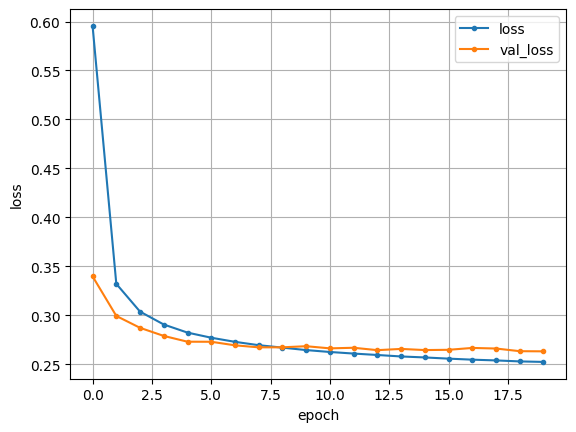

In [9]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



グラフからは、学習が進むにつれて loss の値が徐々に下がり、学習が順調に行われているようにみえます。
ただ  val_loss のほうは、6回目以降は、下がったり、上がったりの繰り返しで、テストデータについては学習の成果が認められないと判断されます。

結局、テストデータに対してどれくらいの精度の予測ができたのかを確認してみましょう。

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(f'テストデータ：loss: {score[0]}')
print(f'テストデータ：Test accuracy: {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 59.2296 - accuracy: 0.9013
テストデータ：loss: 59.22964859008789
テストデータ：Test accuracy: 0.9013000130653381


In [ ]:

# MNISTデータを加工する
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.6139 - accuracy: 0.8440 - val_loss: 0.3436 - val_accuracy: 0.9081
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3340 - accuracy: 0.9066 - val_loss: 0.3024 - val_accuracy: 0.9153
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3047 - accuracy: 0.9144 - val_loss: 0.2895 - val_accuracy: 0.9188
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2912 - accuracy: 0.9186 - val_loss: 0.2811 - val_accuracy: 0.9201
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2832 - accuracy: 0.9212 - val_loss: 0.2747 - val_accuracy: 0.9237
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2771 - accuracy: 0.9227 - val_loss: 0.2733 - val_accuracy: 0.9242
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2735 -

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

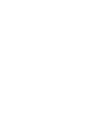

In [ ]:
import matplotlib.pyplot as plt
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap='gray')

plt.show()

NameError: name 'X_train' is not defined

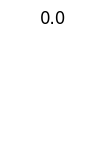

In [ ]:
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.axis('off')
    plt.title(y_train[i][0])  # Extract the first element of y_train[i]
    plt.imshow(X_train[i], cmap='gray')

plt.show()